# Cleveland Heart Disease Data Set 
#### https://archive.ics.uci.edu/ml/datasets/heart+Disease
## Attribute Information

| Attrribute | Type  | Description |
|------------:|-----------:|-----------------------------------------------------------------------------------------------------------:|
| Age | Continuous |in years |
| Sex | Discrete |1 = male 2 = female |
| cp | Discrete |Chest Pain Type 1 Typical Angina 2 Atypical Angina 3 Non Agina Pain 4 Asymptomatic |
| trestbps | Continuous |Resting bp (mmHG) |
| chol | Continuous |Serum cholesterol mg/dl |
| fbs | Discrete |Fasting blood sugar > 120 mg/dl 1 True 0 False |
| restecg | Discrete |Resting ECG 0 Normal 1 having ST-T abnormality 2 showing probable or define left ventricular hypertrophy by Estes' criteria |
| thalach | Continuous |Max heart rate achieved |
| exang | Discrete |Exercise induced angina 1 Yes 0 No |
| Old Peak ST | Continuous |Depression induced by exercise relative to rest |
| Slope | Discrete |Slope of the peak exercise segment 1 Up sloping 2 flat 3 down sloping |
| ca | Discrete |Number of major vessels colored by fluoroscopy range from 0 - 3 |
| thal | Discrete |3 Normal 6 Fixed defect 7 Reversible defect |
| num | Discrete |0 Healthy 1 and greater Patient subject to possible heart disease |

In [53]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [54]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
                )

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 30.8+ KB


In [57]:
# need to fix ca and thal

In [58]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [59]:
# replace '?' with 0
df['ca'] = df['ca'].str.replace('?','0').astype(float)
df['ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [60]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [61]:
# replace ? with 3.0
df['thal'] = df['thal'].str.replace('?','3').astype(float)
df['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [62]:
# convert num into binary; 0 remains, 1,2,3,4 -> 1
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [63]:
df['heart_disease_present'] = df['num'].map(lambda x : 0 if x == 0 else 1)
df['heart_disease_present'].value_counts()

0    164
1    139
Name: heart_disease_present, dtype: int64

In [64]:
df.drop(['num'], axis = 1, inplace = True)
df.info()
df.to_csv('HeartInfluencers.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                      303 non-null float64
sex                      303 non-null float64
cp                       303 non-null float64
trestbps                 303 non-null float64
chol                     303 non-null float64
fbs                      303 non-null float64
restecg                  303 non-null float64
thalach                  303 non-null float64
exang                    303 non-null float64
oldpeak                  303 non-null float64
slope                    303 non-null float64
ca                       303 non-null float64
thal                     303 non-null float64
heart_disease_present    303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x35431770>,
      dtype=object)

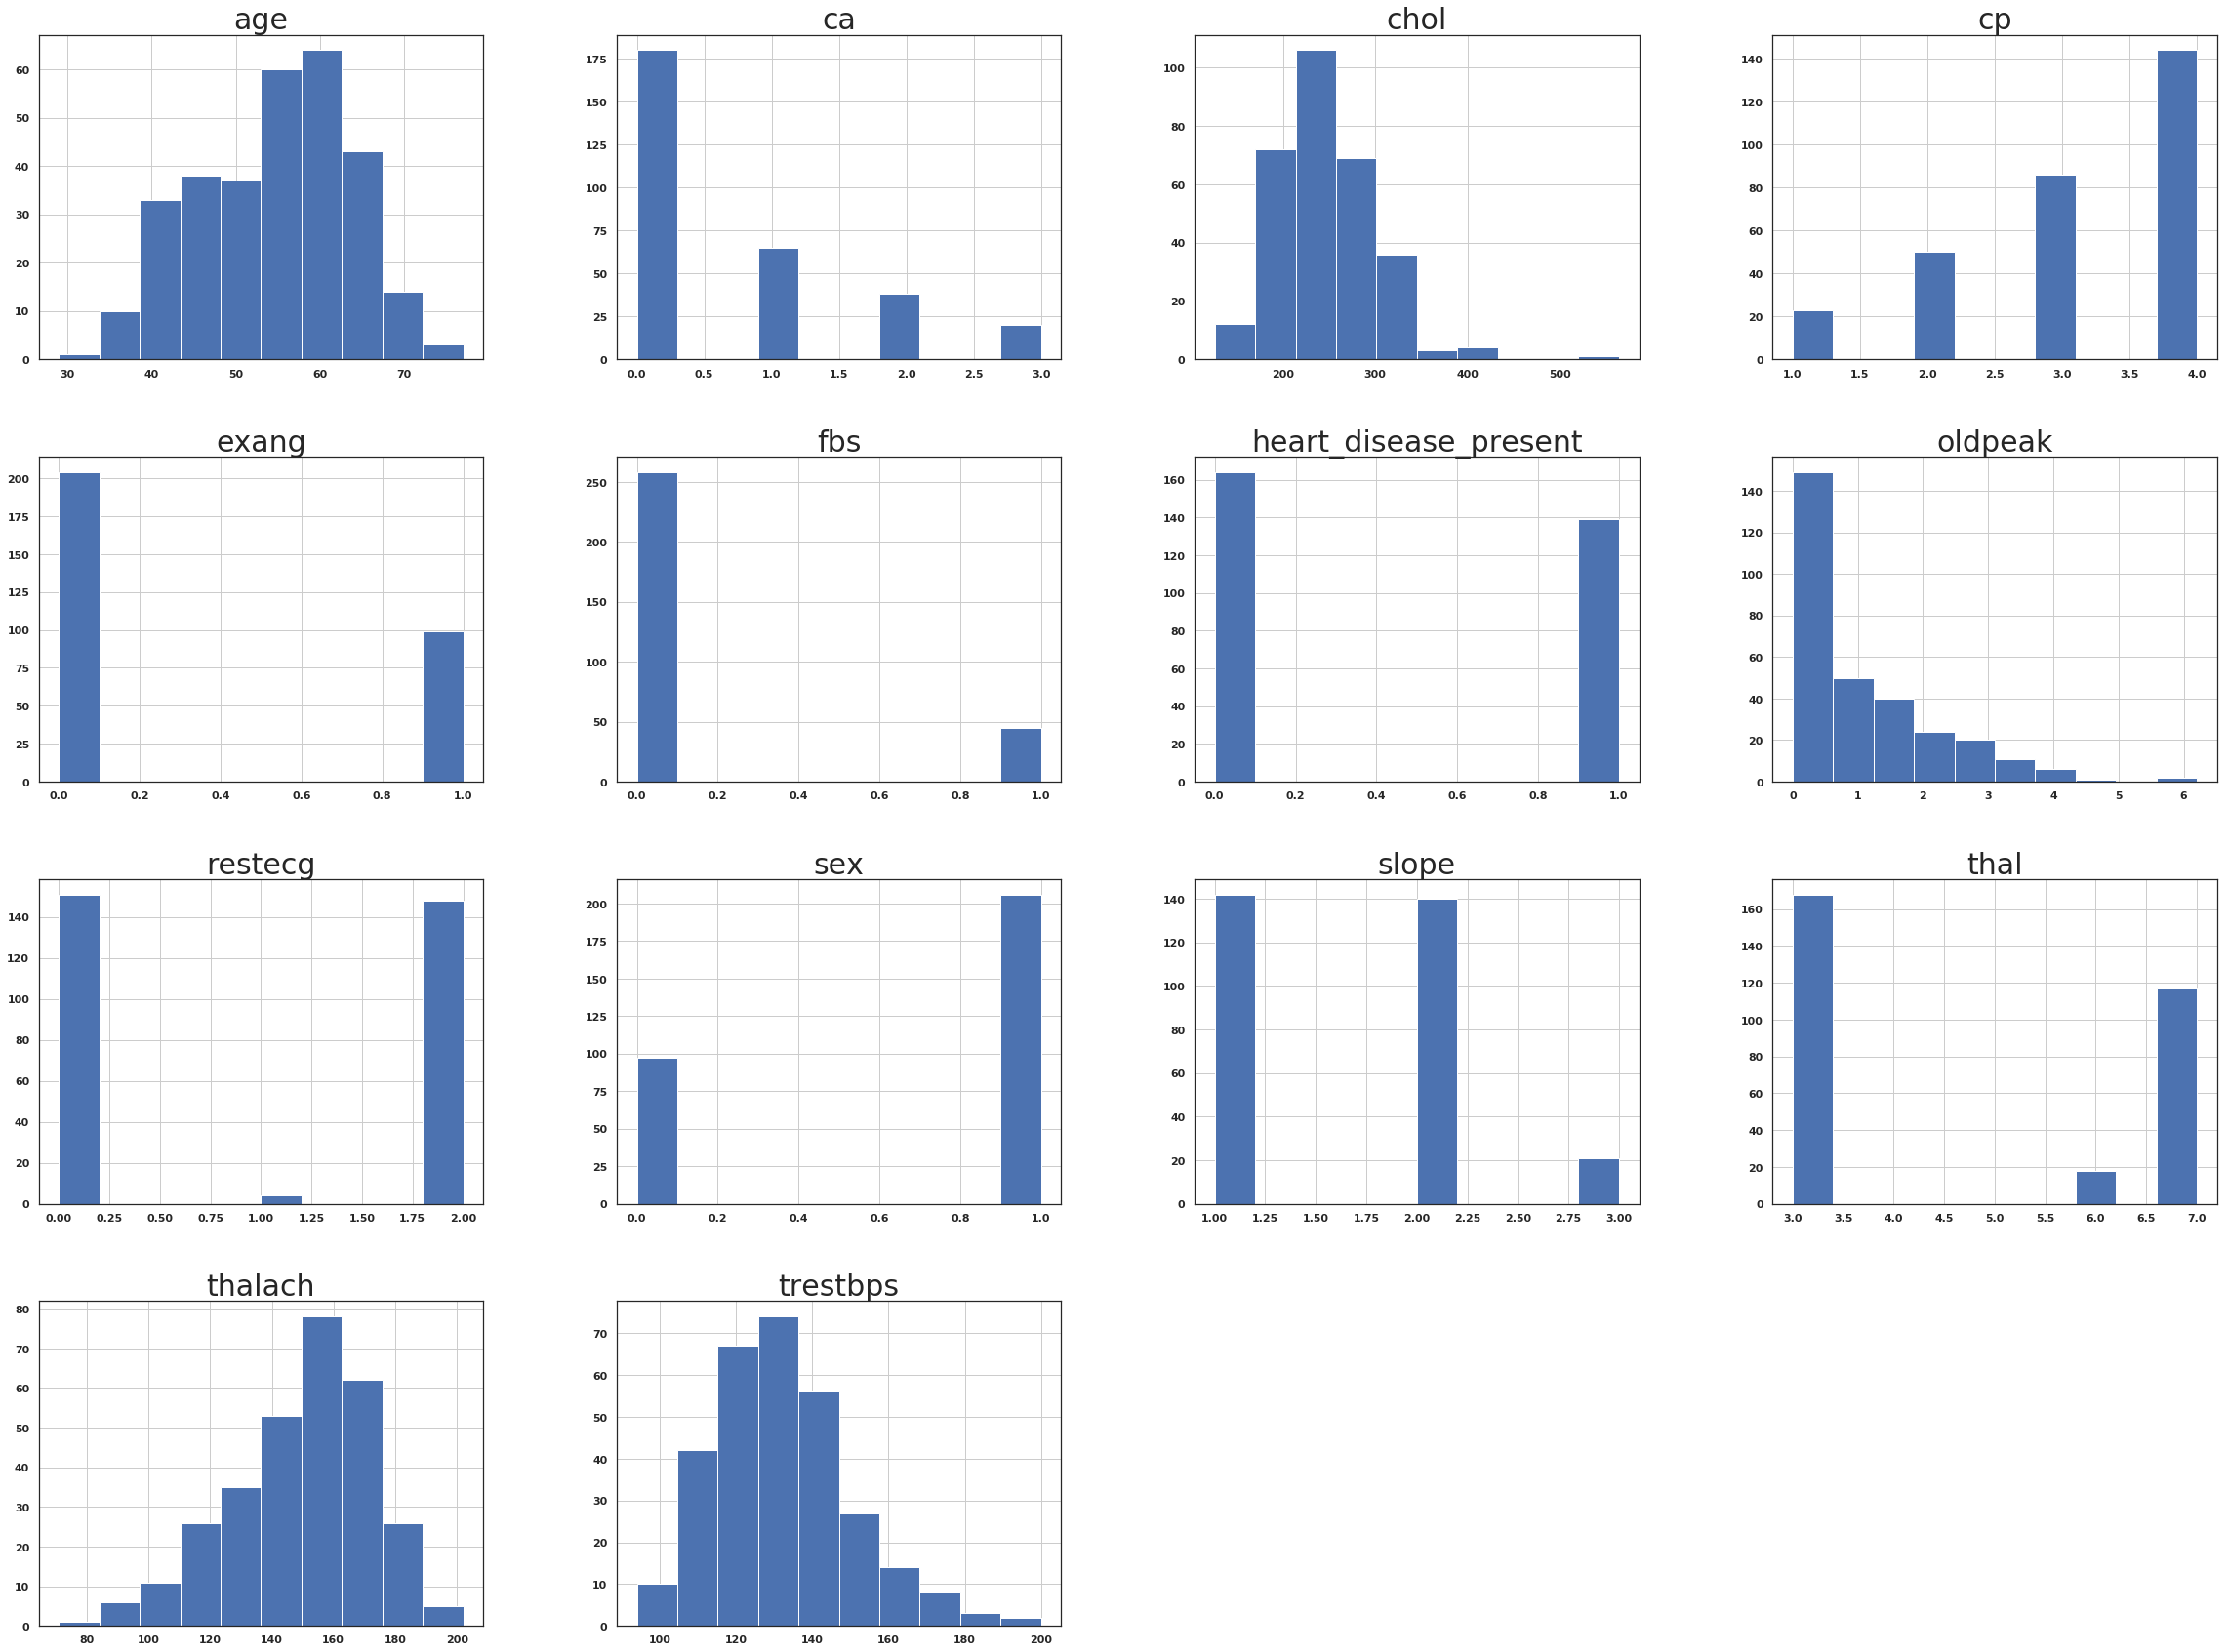

In [89]:
plt.rcParams['font.size']=40
df.hist(figsize =(40,30))

### Noting the balanced class in 'Heart Disease Present'

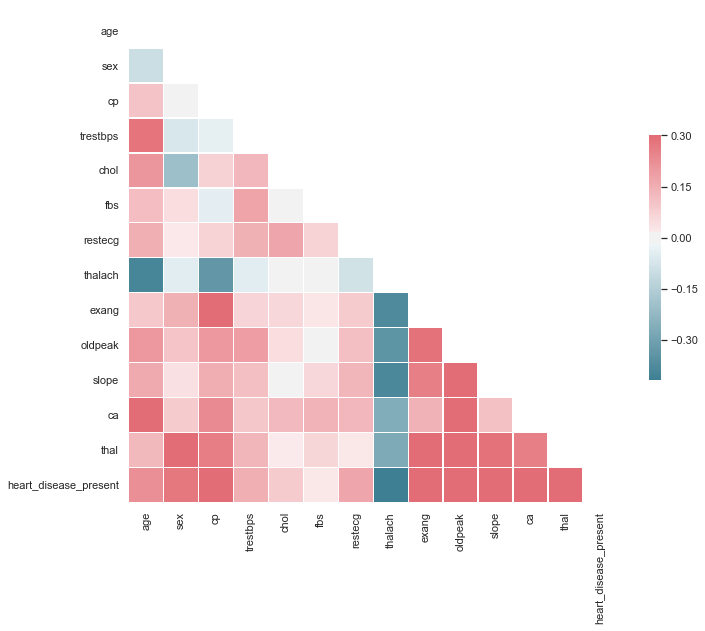

In [42]:
# compute the correlation matrix (Pearson)
df_corr = df.corr(method='pearson')

# mask the upper triangle
sns.set(style = 'white')
mask = np.zeros_like(df_corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib fig
f, ax = plt.subplots (figsize = (11,9))

# custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# plot the heatmap
sns.heatmap(df_corr, mask = mask, cmap=cmap, vmax = .3, center = 0, square = True,linewidths = .5, cbar_kws={'shrink':.5})

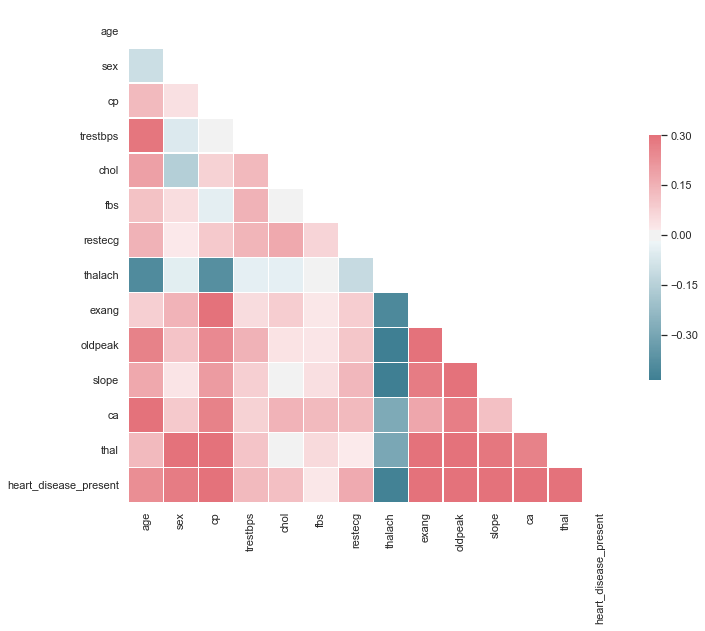

In [43]:
# compute the correlation matrix (Spearman)
df_corr = df.corr(method='spearman')

# mask the upper triangle
sns.set(style = 'white')
mask = np.zeros_like(df_corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib fig
f, ax = plt.subplots (figsize = (11,9))

# custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# plot the heatmap
sns.heatmap(df_corr, mask = mask, cmap=cmap, vmax = .3, center = 0, square = True,linewidths = .5, cbar_kws={'shrink':.5})

In [44]:
array = df.values

X = array[:,0:13]
Y = array[:,13]

# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_,'\n')
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[2.256e+01 7.433e+00 1.514e+01 1.616e+01 2.380e+01 1.647e-01 8.645e+00
 1.838e+02 3.805e+01 7.057e+01 8.244e+00 8.412e+01 6.548e+01] 

[[150.    2.3   0. ]
 [108.    1.5   3. ]
 [129.    2.6   2. ]
 [187.    3.5   0. ]
 [172.    1.4   0. ]]


In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_present
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Features selected thalach (Max Heart Rate achived), oldpeak (Depression induced by exercise relative to rest), ca (No. of blood vessels colored), thal (Normal, fixed defect, reversible defect)

In [46]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False False False False False False  True False False  True
 False]
Feature Ranking: [ 9  1  5 10 11  3  6  8  1  2  7  1  4]


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37

### Features selected sex, exang, ca

In [47]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.075 0.055 0.1   0.077 0.061 0.022 0.035 0.07  0.118 0.073 0.071 0.125
 0.117]


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Features selected thalach, ca, thal